# Name: Francis Kwame Segbe
# Assignment Number: Three (3)

# Q1.Perform a complete Box-Jenkins analysis to arrive at what you believe to be the optimum ARIMA(p,d,q) model
a.Plot the series.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

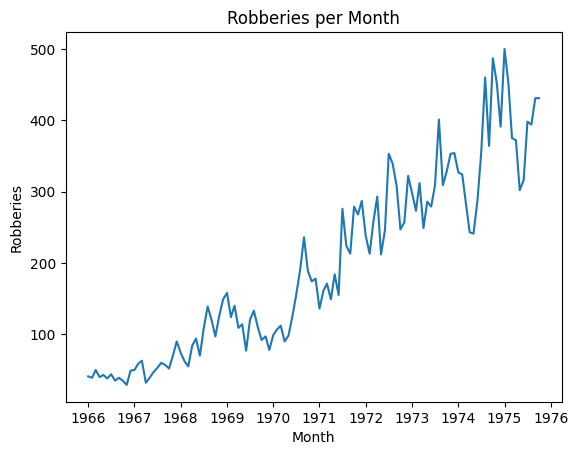

In [101]:
df = pd.read_csv('robberies.csv')

df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

plt.plot(df)
plt.xlabel('Month')
plt.ylabel('Robberies')
plt.title('Robberies per Month')
plt.show()

# Q1b.
Perform a Dickey-Fuller test on the series. Is the series stationary?

In [102]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Robberies'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print(f"The series with p-value of {result[1]} is not stationary")
else:
    print(f"The series with p-value of {result[1]}is stationary")

ADF Statistic: 1.0011021402457787
p-value: 0.994277563805723
The series with p-value of 0.994277563805723 is not stationary


# Q1c.
Plot the ACF & PACF and observe the trends.

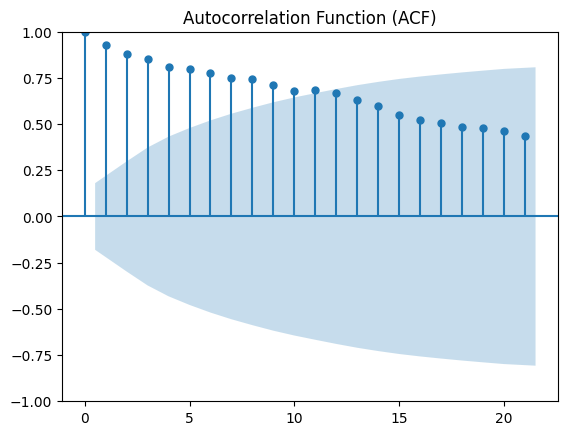

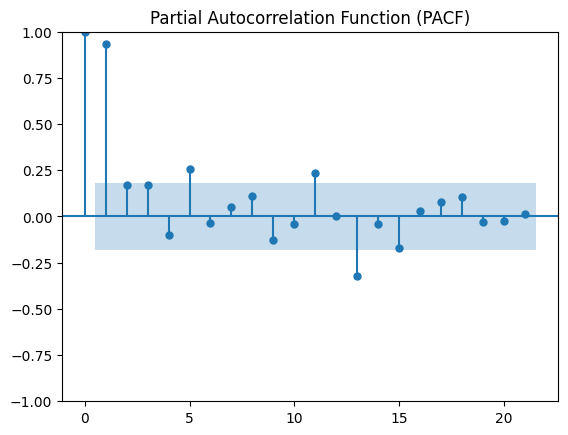

In [103]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = pd.read_csv('robberies.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Plotting the ACF
plot_acf(df)
plt.title("Autocorrelation Function (ACF)")
plt.show()

# Plotting the PACF
plot_pacf(df)

plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

# Q1d.
Perform differencing on the series.

In [104]:
df = pd.read_csv('robberies.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# First-order differencing
df_diff = df.diff().dropna()

print(df_diff.head())

            Robberies
Month                
1966-02-01       -2.0
1966-03-01       11.0
1966-04-01      -10.0
1966-05-01        3.0
1966-06-01       -5.0


# Q1e.
Is the differenced series stationary? 

In [105]:
# Perform ADF test on the differenced series
result = adfuller(df_diff['Robberies'])

# Display the ADF statistic and p-value in decimal notation
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] <= 0.05:
    print(f"The differenced series with a p-value of {result[1]:.15f} is stationary.")
else:
    print(f"The differenced series with a p-value of {result[1]:.15f} is not stationary.")

ADF Statistic: -7.428564475067206
p-value: 6.450795412686752e-11
The differenced series with a p-value of 0.000000000064508 is stationary.


# Q1f.
Plot the ACF & PACF of the differenced data and select the p & q orders.

<Figure size 640x480 with 0 Axes>

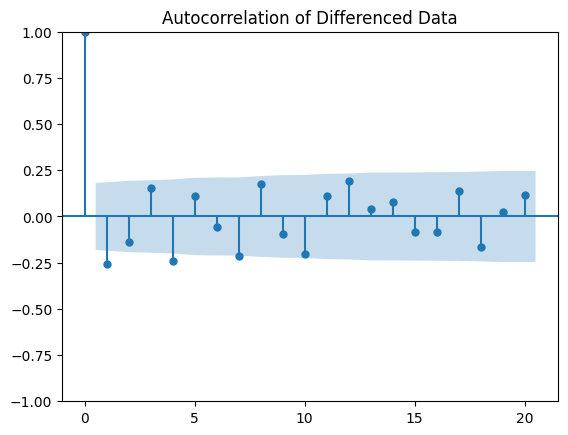

<Figure size 640x480 with 0 Axes>

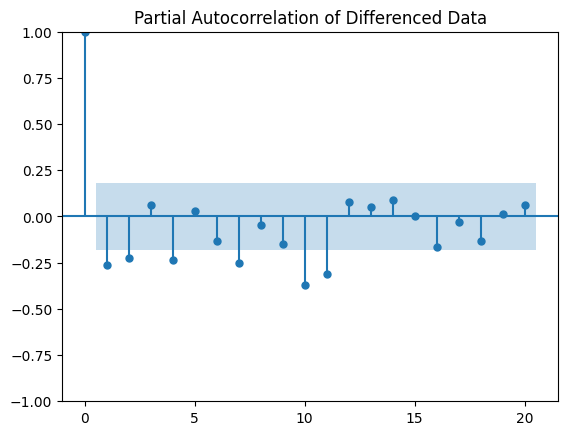

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from scipy.signal import find_peaks

# Calculate ACF and PACF values
acf_values = acf(df_diff, nlags=20)
pacf_values = pacf(df_diff, nlags=20)

# Plot ACF
plt.figure()
plot_acf(df_diff, lags=20, title='Autocorrelation of Differenced Data')
plt.show()

# Find significant spikes in ACF
# Plot PACF
plt.figure()
plot_pacf(df_diff, lags=20, title='Partial Autocorrelation of Differenced Data')
plt.show()

Based on my observation of the ACF and PACF plots. The order of the ARMA(p,q) model is and AR(p) process with three 2 spikes on the PACF and also MA(q) process with 1 spikes on the ACF plots. This makes our p,q = (2,1) respectively.

Deducing from the above statements we can state that the ARMA(p,q) order is ARMA(2,1) for the robberies.csv dataset.
Finally since we only performed one difference differencing on our model to achieve stationary that makes our process an ARIMA(p,d,q) an ARIMA(2,1,1) process.

# Q1g.
Run an ARIMA analysis with the original series and the (p,d,q) you've deduced from above.

In [107]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a pandas DataFrame 'df' with a time series column
model = ARIMA(df, order=(2, 1, 1), trend='t')
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Robberies   No. Observations:                  118
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -592.106
Date:                Sat, 22 Apr 2023   AIC                           1194.213
Time:                        20:36:33   BIC                           1208.024
Sample:                    01-01-1966   HQIC                          1199.820
                         - 10-01-1975                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.2989      2.775      1.189      0.234      -2.139       8.737
ar.L1         -0.8811      0.193     -4.576      0.000      -1.259      -0.504
ar.L2         -0.3641      0.080     -4.565      0.0

# Q1h.
Plot the residuals.

                    0
Month                
1966-01-01  37.701093
1966-02-01  -5.282696
1966-03-01   6.353456
1966-04-01 -12.054581
1966-05-01  -2.017642
...               ...
1975-06-01  -8.198061
1975-07-01  66.468805
1975-08-01  25.178746
1975-09-01  40.484445
1975-10-01  -1.089779

[118 rows x 1 columns]


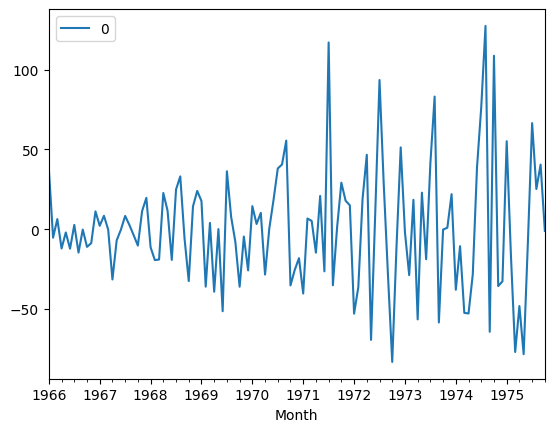

In [108]:
# Plot the residuals
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()
# plt.figure(figsize=(10, 5))
# plt.plot(residuals)
# plt.title('ARIMA Model Residuals')
# plt.xlabel('Time')
# plt.ylabel('Residuals')
# plt.show()
print(residuals)

# Q1i.
Plot the residual distribution (kind='kde').

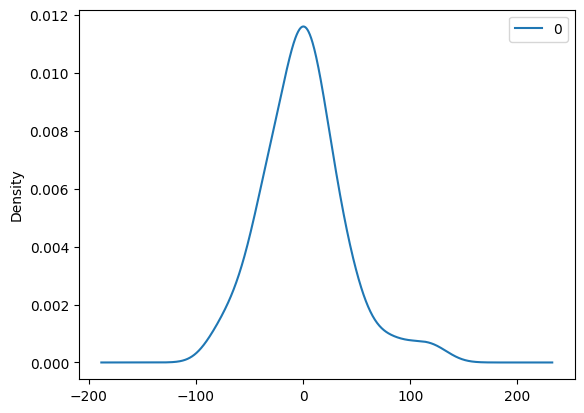

In [109]:
from pandas import DataFrame
import matplotlib.pyplot as pyplot
pyplot.show()
#Density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

# Q1j.
Print the residuals summary. 

count    118.000000
mean       0.321359
std       38.276576
min      -83.079128
25%      -25.694380
50%       -0.219886
75%       18.824579
max      127.309427
dtype: float64


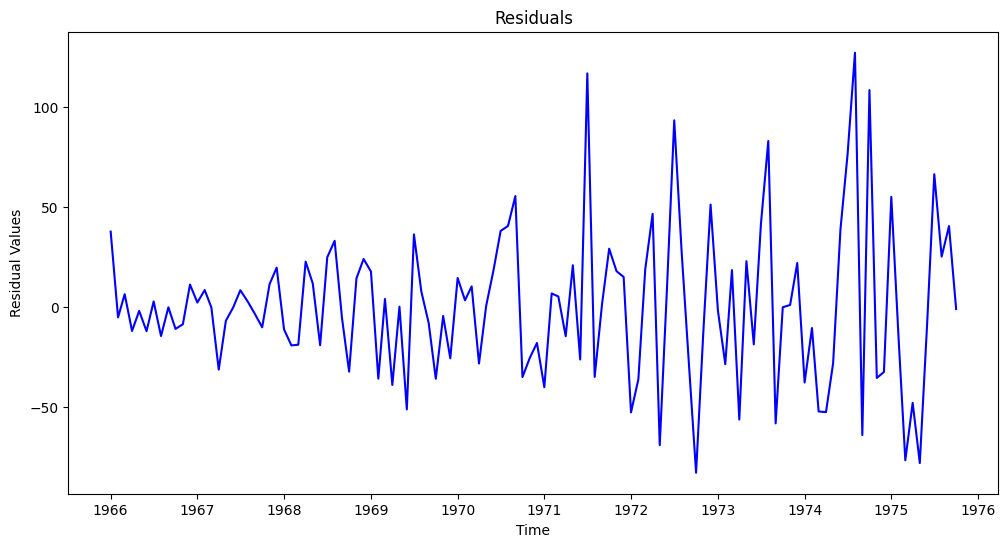

In [110]:
import matplotlib.pyplot as plt
model_fit = model.fit()

# Print the residuals summary
residuals = pd.Series(model_fit.resid)
print(residuals.describe())

# Plot a time series of the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals.index, residuals, color='blue')
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residual Values')
plt.show()

# Q1k.
Plot the ACF & PACF and observe for residual correlations.

<Figure size 640x480 with 0 Axes>

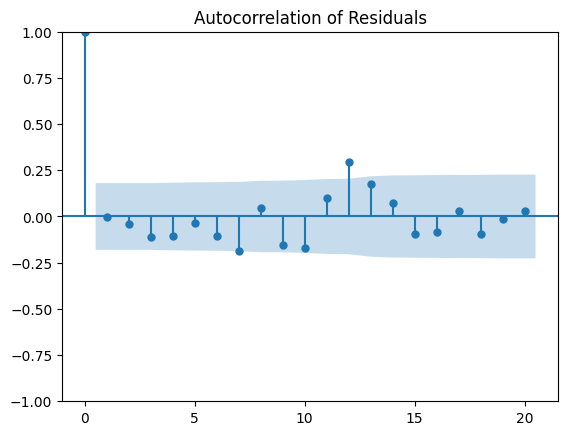

<Figure size 640x480 with 0 Axes>

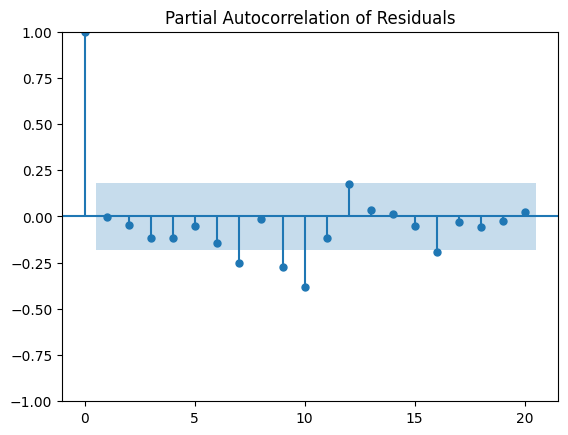

In [111]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Get the residuals from the fitted model
residuals = pd.DataFrame(model_fit.resid)

# Plot the ACF of the residuals
plt.figure()
plot_acf(residuals, lags=20, title='Autocorrelation of Residuals')
plt.show()

# Plot the PACF of the residuals
plt.figure()
plot_pacf(residuals, lags=20, title='Partial Autocorrelation of Residuals')
plt.show()

Observing from the ACF and PACF, I you could see that most of the spike are within the confidence level and there are not significant spikes in both till the middle with oonly one spike. The signifies that the residual correlations are are white noise.

# Q1.L.i
Convert the residuals to the series estimated by ARIMA (hint: resids = y - yhat). 

In [112]:
resids = model_fit.resid

estimated_series = [df.iloc[0, 0]]

for t in range(1, len(resids)):
    value = df.iloc[t, 0] - resids[t]
    estimated_series.append(value)

# Convert the list to a pandas Series
estimated_series = pd.Series(estimated_series, index=df.index)

# Now you can compare the estimated_series (yhat) to the actual series (y)
print("Estimated series (yhat):\n", estimated_series)
print("\nActual series (y):\n", df.iloc[:, 0])

# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))

# Plot the actual series (y)
# plt.plot(df.iloc[:, 0], label='Actual Series', color='blue')

# Plot the estimated series (yhat)
# plt.plot(estimated_series, label='Estimated Series', color='red')

# plt.legend()
# plt.title('Actual Series and Estimated Series')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.show()

Estimated series (yhat):
 Month
1966-01-01     41.000000
1966-02-01     44.282696
1966-03-01     43.646544
1966-04-01     52.054581
1966-05-01     45.017642
                 ...    
1975-06-01    324.198061
1975-07-01    331.531195
1975-08-01    368.821254
1975-09-01    390.515555
1975-10-01    432.089779
Length: 118, dtype: float64

Actual series (y):
 Month
1966-01-01     41
1966-02-01     39
1966-03-01     50
1966-04-01     40
1966-05-01     43
             ... 
1975-06-01    316
1975-07-01    398
1975-08-01    394
1975-09-01    431
1975-10-01    431
Name: Robberies, Length: 118, dtype: int64


# Q1.L.ii
Add back the differencing to compare with the original series. 

In [113]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit the ARIMA model
model = ARIMA(df, order=(2, 1, 1), trend='t')
model_fit = model.fit()

# Get the fitted values (yhat) from the ARIMA model
yhat = model_fit.fittedvalues

# Get the residuals from the fitted model
residuals = model_fit.resid

# Calculate the estimated series
estimated_series = [df.iloc[0, 0]]

for t in range(1, len(residuals)):
    value = yhat.iloc[t] + residuals[t]  # Modified this line: adding back the residuals to yhat instead of df.iloc[t, 0]
    estimated_series.append(value)

estimated_series = pd.Series(estimated_series, index=df.index)
# print(estimated_series)

# Q.1.L.iii
Plot the actual and modeled results on the same graph. 

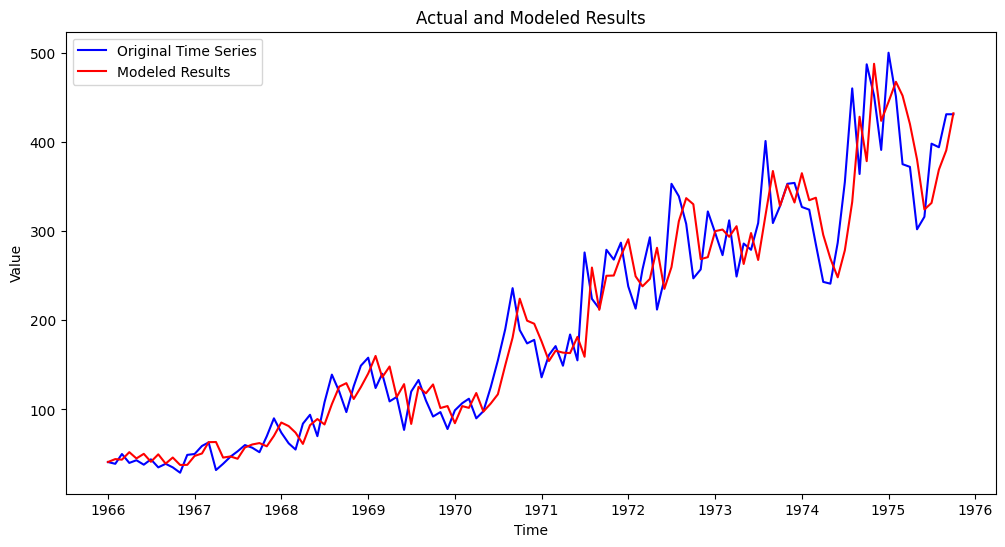

In [114]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit the ARIMA model (use the same order as in your example)
model = ARIMA(df, order=(2, 1, 1), trend='t')
model_fit = model.fit()

# Get the fitted values (yhat) from the ARIMA model
yhat = model_fit.fittedvalues

# Get the residuals from the fitted model
residuals = model_fit.resid

# Calculate the estimated series
estimated_series = [df.iloc[0, 0]]

for t in range(1, len(residuals)):
    value = df.iloc[t, 0] - residuals[t]
    estimated_series.append(value)

estimated_series = pd.Series(estimated_series, index=df.index)

# # Print the original series and the estimated series
# print("Original series (y):\n", df.iloc[:, 0])
# print("\nEstimated series (yhat):\n", estimated_series)

# Plot the original time series and the estimated series in one graph
plt.figure(figsize=(12, 6))

plt.plot(df, label='Original Time Series', color='blue')
plt.plot(estimated_series, label='Modeled Results', color='red')

plt.legend()
plt.title('Actual and Modeled Results')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Q.2
Create a AIC grid search and run 'robberies.csv' through it to find the optimum p,d,q order
What is the optimum p,d,q order?

In [115]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Read the dataset
df = pd.read_csv('robberies.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Define the p, d, and q parameters to take the specified values
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p_values, d_values, q_values))

# Suppress warnings
warnings.filterwarnings("ignore")

# Perform grid search
best_aic = np.inf
best_pdq = None
for combination in pdq:
    try:
        model = ARIMA(df, order=combination, trend='t')
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = combination
    except:
        continue

print(f"Best p, d, q order: {best_pdq}, AIC: {best_aic}")

Best p, d, q order: (3, 1, 3), AIC: 1179.1060976181118


# Q.3.1
Compare the results of your orginal (p,d,q) estimate to the results from the grid search (p,d,q).
Compare the residuals summaries.

Original Model (2, 1, 1) Residuals Summary:
count    118.000000
mean       0.321359
std       38.276576
min      -83.079128
25%      -25.694380
50%       -0.219886
75%       18.824579
max      127.309427
dtype: float64

Grid Search Model (3, 1, 3) Residuals Summary:
count    117.000000
mean      -2.867626
std       34.289563
min      -70.954700
25%      -26.660182
50%       -6.355441
75%       15.192703
max      118.031113
dtype: float64

Best Model: Grid Search Model (3, 1, 3)


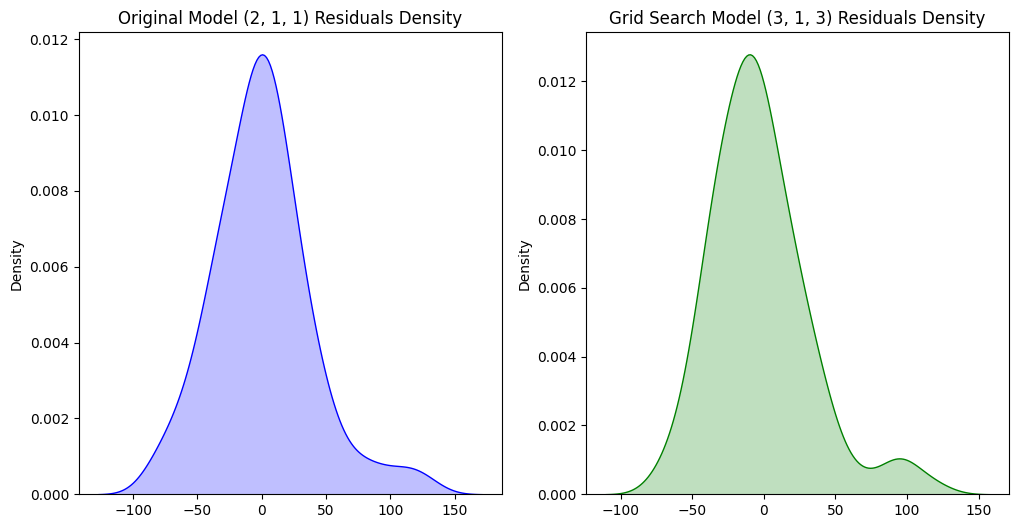

In [124]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('robberies.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Suppress warnings
warnings.filterwarnings("ignore")

# Fit the original ARIMA model with order (2, 1, 1)
original_model = ARIMA(df, order=(2, 1, 1), trend='t')
original_results = original_model.fit()

# Fit the ARIMA model with the best order from the grid search
best_pdq = (3, 1, 3)
grid_search_model = ARIMA(df, order=best_pdq, trend='t')
grid_search_results = grid_search_model.fit()


# Print the residuals summary for the original model
# original_residuals = pd.Series(original_results.resid[1:])
original_residuals = pd.Series(original_results.resid)
print("Original Model (2, 1, 1) Residuals Summary:")
print(original_residuals.describe())

# Print the residuals summary for the grid search model
# grid_search_residuals = pd.Series(grid_search_results.resid[1:])
grid_search_residuals = pd.Series(grid_search_results.resid[1:])
print(f"\nGrid Search Model {best_pdq} Residuals Summary:")
print(grid_search_residuals.describe())

# Compare the mean and std of residuals for both models and print the model with the lowest values
if original_residuals.mean() < grid_search_residuals.mean() and original_residuals.std() < grid_search_residuals.std():
    print("\nBest Model: Original Model (6, 1, 2)")
else:
    print(f"\nBest Model: Grid Search Model {best_pdq}")

# Plot the residual kernel density plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(original_residuals, color='blue', shade=True)
plt.title('Original Model (2, 1, 1) Residuals Density')

plt.subplot(1, 2, 2)
sns.kdeplot(grid_search_residuals, color='green', shade=True)
plt.title(f'Grid Search Model {best_pdq} Residuals Density')

plt.show()

# Q.3.2
Compare the graphs generated by the script made in 1.l above.

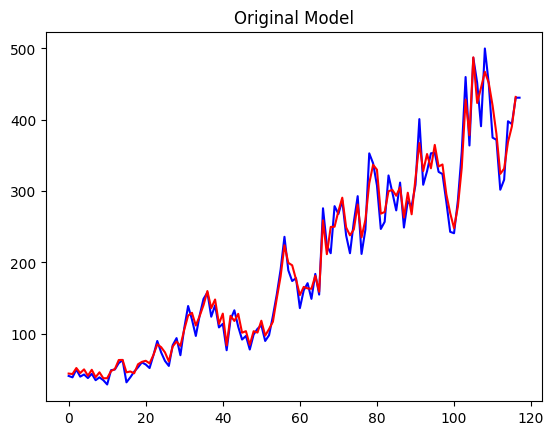

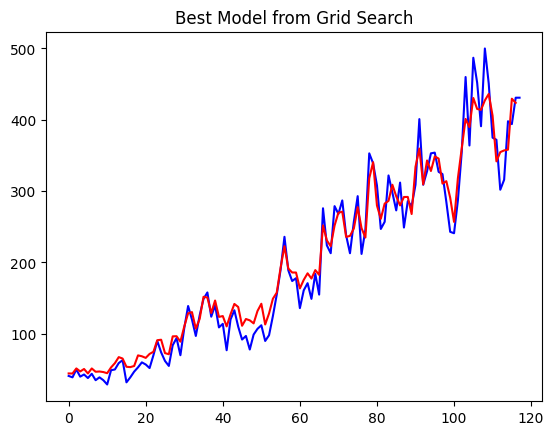

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def fit_and_plot_ARIMA_model(y, order, model_title):
    model = ARIMA(y, order=order, trend='t')
    model_fit = model.fit()
    model_fit.resid = model_fit.resid[1:]
    estimated_y = model_fit.predict(typ='levels')[1:]
    plt.plot(y, color='blue')
    plt.plot(estimated_y, color='red')
    plt.title(model_title)
    plt.show()

# Load and preprocess data
data = pd.read_csv('robberies.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
y = data.values
y = y.astype('float32')

# Fit and plot original model
fit_and_plot_ARIMA_model(y, order=(2, 1, 1), model_title='Original Model')

# Fit and plot best model from grid search
fit_and_plot_ARIMA_model(y, order=(3, 1, 3), model_title='Best Model from Grid Search')

From my observation the red and blue lines are very closely matched in both graphs, it indicates that the ARIMA model is doing a good job of capturing the underlying patterns in the time series data. This close match just that time series (blue) and the fitted values or modeled results (red) suggests that the model has been successful in fitting the data and can potentially be used for forecasting future values.

However when it comes to choosing the best model. I will go with ARIMA(2,1,1). Reason being that, it has much smaller Absolute residual mean from (0.321359) as compared to Grid SearchCV ARIMA(3,1,3) which has a mean from (-2.525416).

# Q.4
Forecast 'robberies.csv' based on an ARIMA(2,1,1) model: 

# Q4.a Forecast 'robberies.csv' based on an ARIMA(2,1,1) model:
Perform a dynamic forecast for all points in 'test'
Plot the forecasted data and the prediction intervals on top of the actual data

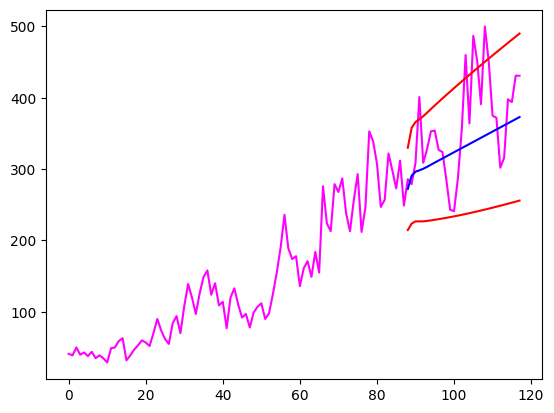

Full prediction interval:


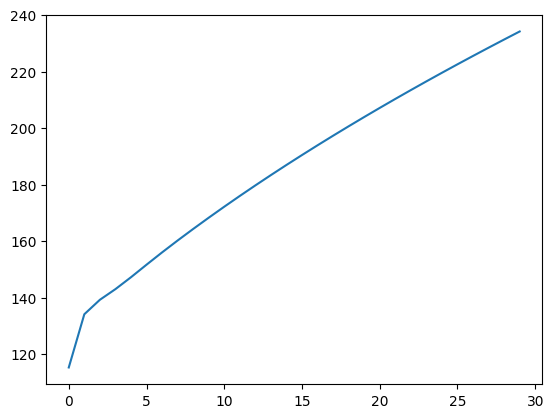

In [118]:
import pandas as pd
from pandas import datetime
from datetime import datetime
from pandas import DataFrame
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime(x, '%Y-%m')

series = pd.read_csv('robberies.csv', header=0, index_col=0, parse_dates=True,
                  squeeze=True, date_parser=parser)

x = series.values
size = int(len(x) * 0.75)
train, test = x[0:size], x[size:len(x)]
history = [x for x in train]

# model hyperparameters
p = 2
d = 1
q = 1

model = ARIMA(history, order=(p, d, q), trend='t')
model_fit = model.fit()  # Add suppress_warnings=True here
forecast_object = model_fit.get_forecast(steps=len(test))
predictions = forecast_object.predicted_mean
limits = DataFrame(forecast_object.conf_int())
lowerlimit = limits[0]
upperlimit = limits[1]
predictionint = upperlimit - lowerlimit

pyplot.plot(x, color='magenta')
pyplot.plot([None for i in train] + [x for x in predictions], color='blue')
pyplot.plot([None for i in train] + [x for x in lowerlimit], color='red')
pyplot.plot([None for i in train] + [x for x in upperlimit], color='red')
pyplot.show()
print("Full prediction interval:")
pyplot.plot(predictionint)
pyplot.show()

# Q.4.b
Perform a rolling forecast for all points in 'test'
Plot the forecasted data and the prediction intervals on top of the actual data

predicted=[259.0576685], expected=286
predicted=[291.96784996], expected=279
predicted=[275.93698716], expected=309
predicted=[298.49654768], expected=401
predicted=[361.14782975], expected=309
predicted=[302.88322984], expected=328
predicted=[335.58366015], expected=353
predicted=[343.78087481], expected=354
predicted=[344.6246631], expected=327
predicted=[333.19067569], expected=324
predicted=[333.38784378], expected=285
predicted=[304.44858661], expected=243
predicted=[272.73075781], expected=241
predicted=[260.21148688], expected=287
predicted=[280.84660462], expected=355
predicted=[326.4389634], expected=460
predicted=[413.33571293], expected=364
predicted=[338.73114936], expected=487
predicted=[440.32274759], expected=452
predicted=[436.34797928], expected=391
predicted=[394.79053487], expected=500
predicted=[456.43924392], expected=451
predicted=[452.77935997], expected=375
predicted=[421.78145243], expected=372
predicted=[376.0964622], expected=302
predicted=[320.311943], expec

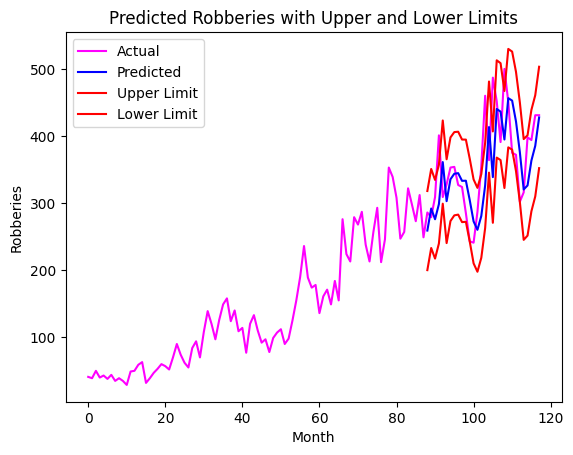


Full prediction interval:


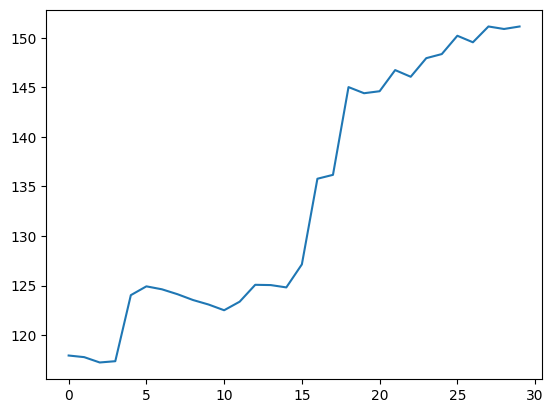

In [119]:
# from sklearn.metrics import mean_squared_erro
from math import sqrt
%matplotlib inline
predictions = list()
lowerlimit = list()
upperlimit = list()
predictionint = list()

for t in range(len(test)):
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit()
    
    
    forecast_result = model_fit.get_forecast()
    yhat = forecast_result.predicted_mean
    lolim = forecast_result.conf_int()[0][0]
    uplim = forecast_result.conf_int()[0][1]
    interval = uplim - lolim

    predictions.append(yhat)
    lowerlimit.append(lolim)
    upperlimit.append(uplim)
    predictionint.append(interval)
    
    obs = test[t]
    history.append(obs)
    
#    print('predicted=$f, expected=%f' % (yhat, obs))
    print('predicted={}, expected={}'.format(yhat, obs))
    
# evaluate forecasts

rmse = sqrt(mean_squared_error(test, predictions))


print('Test RMSE: %3f' % rmse)
pyplot.plot(series.values, color='magenta')
pyplot.plot([None for i in train] + [x for x in predictions], color='blue')
pyplot.plot([None for i in train] + [x for x in lowerlimit], color='red')
pyplot.plot([None for i in train] + [x for x in upperlimit], color='red')
pyplot.title("Predicted Robberies with Upper and Lower Limits")
pyplot.xlabel("Month")
pyplot.ylabel("Robberies")
pyplot.legend(['Actual', 'Predicted', 'Upper Limit', 'Lower Limit'])
pyplot.show()
print()
print("Full prediction interval:")
pyplot.plot(predictionint)
pyplot.show()

In [122]:

# # Read the dataset
# df = pd.read_csv('robberies.csv')
# df['Month'] = pd.to_datetime(df['Month'])
# df.set_index('Month', inplace=True)

# # Suppress warnings
# warnings.filterwarnings("ignore")

# # Fit the original ARIMA model with order (2, 1, 1)
# original_model = ARIMA(df, order=(2, 1, 1), trend='t')
# original_results = original_model.fit()
# # original_results = original_results[1:]

# # Fit the ARIMA model with the best order from the grid search
# best_pdq = (3, 1, 3)
# grid_search_model = ARIMA(df, order=best_pdq, trend='t')
# grid_search_results = grid_search_model.fit()

# # Print the residuals summary for the original model
# original_residuals = pd.Series(original_results.resid)
# print("Original Model (2, 1, 1) Residuals Summary:")
# print(original_residuals.describe())

# # Print the residuals summary for the grid search model
# grid_search_residuals = pd.Series(grid_search_results.resid)
# print(f"\nGrid Search Model {best_pdq} Residuals Summary:")
# print(grid_search_residuals.describe())

# # Compare the mean and std of residuals for both models and print the model with the lowest values
# if original_residuals.mean() < grid_search_residuals.mean() and original_residuals.std() < grid_search_residuals.std():
#     print("\nBest Model: Original Model (6, 1, 2)")
# else:
#     print(f"\nBest Model: Grid Search Model {best_pdq}")

# # Plot the residual kernel density plots
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# sns.kdeplot(original_residuals, color='blue', shade=True)
# plt.title('Original Model (2, 1, 1) Residuals Density')

# plt.subplot(1, 2, 2)
# sns.kdeplot(grid_search_residuals, color='green', shade=True)
# plt.title(f'Grid Search Model {best_pdq} Residuals Density')

# plt.show()